In [62]:
import pandas as pd

In [63]:
def calculate_surrounding_cell_types(df, center_cells, radius=50):
    results = []

    for _, center in center_cells.iterrows():
        center_x, center_y = center['x'], center['y']
        df['distance'] = ((df['x'] - center_x)**2 + (df['y'] - center_y)**2)**0.5
        surrounding_cells = df[(df['distance'] <= radius) & (df['distance'] > 0)]
        cell_type_counts = surrounding_cells.drop_duplicates(subset=['x', 'y'])['claster'].value_counts().to_dict()
        if center['claster'] in cell_type_counts:
            del cell_type_counts[center['claster']]
        results.append({
            'center_cell': center['cell'],
            'x': center_x,
            'y': center_y,
            'surrounding_cell_types': cell_type_counts
        })
    
    return results

In [21]:
file_path = './cluster-niche/A2-1.csv'
df = pd.read_csv(file_path)
df['y'] = df['cell'].str.split(")").str[0].str.split(",").str[1].astype(float)
df['x'] = df['cell'].str.split("(").str[1].str.split(",").str[0].astype(float)
center_cells = df[df['B646L'] > 9]

surrounding_stats = calculate_surrounding_cell_types(df, center_cells)
total_cell_types = {}

for stat in surrounding_stats:
    for cell_type, count in stat['surrounding_cell_types'].items():
        if cell_type in total_cell_types:
            total_cell_types[cell_type] += count
        else:
            total_cell_types[cell_type] = count

print("Total Counts for Each Cell Type:")
for cell_type, total_count in total_cell_types.items():
    print(f"{cell_type}: {total_count}")

Total Counts for Each Cell Type:
Undefined: 9
AT2: 4
Dendritic: 7
T_others: 3
AM: 4
Endothelial: 2
AT1: 3
Mac: 9
B_cell: 2
Tc: 2
Monocyte: 2
Neutrophil: 1
Treg: 1
NK_cell: 1


In [64]:
import os

A2-1
(1899, 1943)
0
0
0
0
0
0


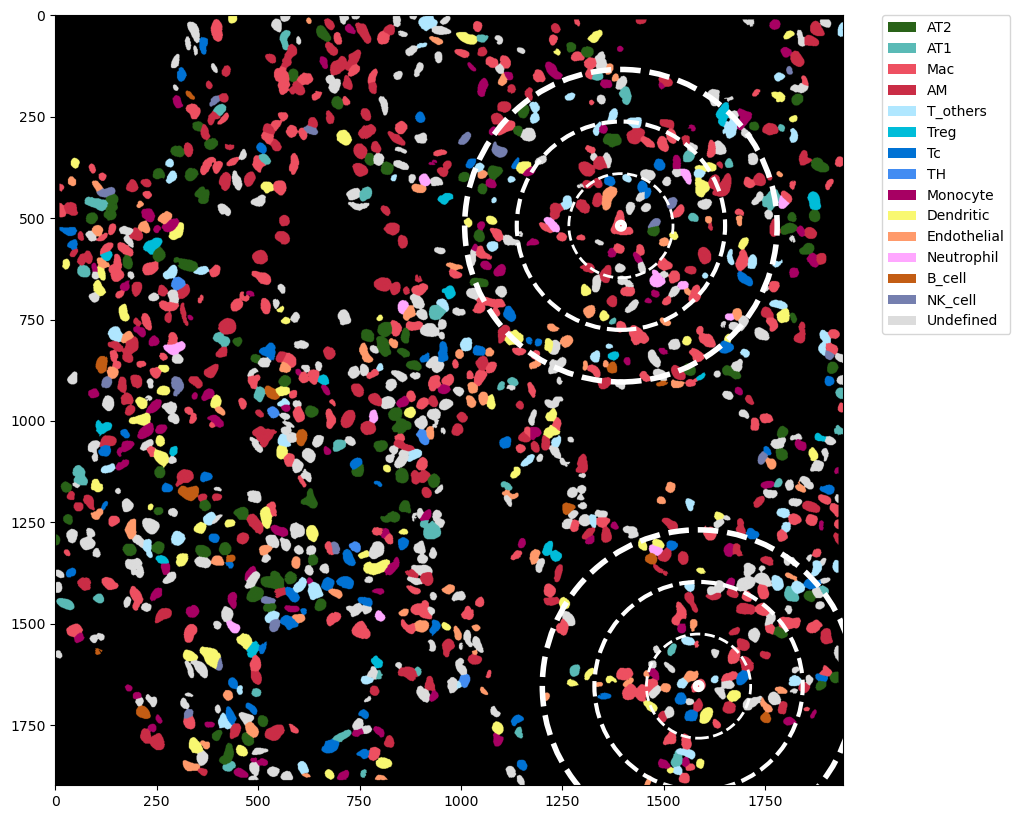

<Figure size 640x480 with 0 Axes>

In [79]:
samples = ["A2-1"]
input_dir = './cluster-niche'

cell_types = ['AT2',
 'AT1',
 'Mac',
 'AM',
 'T_others',
 'Treg',
 'Tc',
 'TH',
 'Monocyte',
 'Dendritic',
 'Endothelial',
 'Neutrophil',
 'B_cell',
 'NK_cell',
 'Undefined']

colors = ["#296218", "#5ABAB6", "#EE5061", "#CA2D46", 
          "#B0E7FF", "#00BDD9", "#0072D4", "#428CF2", 
          "#A70063", "#F9F871", "#FF9A6B", "#FFA7FF", 
          "#C35D14", "#757FAF", "#DCDCDC"]


for sample in samples:
    print(sample)    
    cell_df = pd.read_csv(f"./{input_dir}/{sample}.csv", sep=",")
    cell_df = cell_df.drop(columns=['niche'])
    last_row = cell_df.iloc[-1]
    file = sample.split('-')[0]
    id = sample.split('-')[1]
    mask = imread(f"../mask/{file}_{id}_mask.tif")
    print(mask.shape)
    mask = mask
    new_mask = get_new_mask(mask, cell_df)
    m0 = new_mask
    fig, ax = plt.subplots(figsize=(20, 10))
    # ax.imshow(binary, alpha=1)
    output_path = f'./{sample}.pdf'
    center_cells = cell_df[cell_df['B646L'] > 27][:2]
    center_cells['y'] = center_cells['cell'].str.split(")").str[0].str.split(",").str[1].astype(float)
    center_cells['x'] = center_cells['cell'].str.split("(").str[1].str.split(",").str[0].astype(float)
    x = center_cells['x']
    y = center_cells['y']
    spots = 5  # Example: 150 pixels in diameter
    spots_center = (spots / (96 / 72))**2  # Convert pixels to points
    _outer_size_in_pixels = 300  # Example: 150 pixels in diameter
    _outer_area_in_points = (_outer_size_in_pixels / (96 / 72))**2  # Convert pixels to points
    outer_size_in_pixels = 200  # Example: 150 pixels in diameter
    outer_area_in_points = (outer_size_in_pixels / (96 / 72))**2  # Convert pixels to points
    inner_size_in_pixels = 100  # Example: 100 pixels in diameter
    inner_area_in_points = (inner_size_in_pixels / (96 / 72))**2  # Convert pixels to points
    ax.scatter(y, x, s=_outer_area_in_points, marker='o', edgecolors='white', facecolors='none', linewidths=4,linestyle='--')
    ax.scatter(y, x, s=outer_area_in_points, marker='o', edgecolors='white', facecolors='none', linewidths=3,linestyle='--')
    ax.scatter(y, x, s=inner_area_in_points, marker='o', edgecolors='white', facecolors='none', linewidths=2,linestyle='--')
    ax.scatter(y, x, s=spots_center, marker='o', edgecolors='white', facecolors='none', linewidths=5)
    draw_type_mask(ax, new_mask, colors=colors, labels=cell_types)
    ax.axis('off')
    output_path = f'./{sample}.pdf'
    plt.savefig(output_path, format='pdf', bbox_inches='tight')
    plt.show()

In [65]:
input_dir = 'cluster-niche'
files = os.listdir(input_dir)
all_results = pd.DataFrame(columns=['File', 'Cell Type', 'Total Count'])

for file in files:
    file_path = os.path.join(input_dir, file)
    df = pd.read_csv(file_path)
    df['y'] = df['cell'].str.split(")").str[0].str.split(",").str[1].astype(float)
    df['x'] = df['cell'].str.split("(").str[1].str.split(",").str[0].astype(float)
    center_cells = df[df['B646L'] > 27]

    surrounding_stats = calculate_surrounding_cell_types(df, center_cells,radius=100)
    total_cell_types = {}

    for stat in surrounding_stats:
        for cell_type, count in stat['surrounding_cell_types'].items():
            if cell_type in total_cell_types:
                total_cell_types[cell_type] += count
            else:
                total_cell_types[cell_type] = count
    file_results = pd.DataFrame({
        'File': [file] * len(total_cell_types),
        'Cell Type': list(total_cell_types.keys()),
        'Total Count': list(total_cell_types.values())
    })
    
    all_results = pd.concat([all_results, file_results], ignore_index=True)

output_dir = 'pixels_circle_27'
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, '100_pixels.csv')
all_results.to_csv(output_file, index=False)
print(f"Cell type counts written to '{output_file}'.")

Cell type counts written to 'pixels_circle_27\100_pixels.csv'.


In [66]:
input_dir = 'cluster-niche'
files = os.listdir(input_dir)
all_results = pd.DataFrame(columns=['File', 'Cell Type', 'Total Count'])

for file in files:
    file_path = os.path.join(input_dir, file)
    df = pd.read_csv(file_path)
    df['y'] = df['cell'].str.split(")").str[0].str.split(",").str[1].astype(float)
    df['x'] = df['cell'].str.split("(").str[1].str.split(",").str[0].astype(float)
    center_cells = df[df['B646L'] > 9]

    surrounding_stats = calculate_surrounding_cell_types(df, center_cells,radius=200)
    total_cell_types = {}

    for stat in surrounding_stats:
        for cell_type, count in stat['surrounding_cell_types'].items():
            if cell_type in total_cell_types:
                total_cell_types[cell_type] += count
            else:
                total_cell_types[cell_type] = count
    file_results = pd.DataFrame({
        'File': [file] * len(total_cell_types),
        'Cell Type': list(total_cell_types.keys()),
        'Total Count': list(total_cell_types.values())
    })
    
    all_results = pd.concat([all_results, file_results], ignore_index=True)

output_dir = 'pixels_circle_27'
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, '200_pixels.csv')
all_results.to_csv(output_file, index=False)
print(f"Cell type counts written to '{output_file}'.")

Cell type counts written to 'pixels_circle_27\200_pixels.csv'.


In [67]:
input_dir = 'cluster-niche'
files = os.listdir(input_dir)
all_results = pd.DataFrame(columns=['File', 'Cell Type', 'Total Count'])

for file in files:
    file_path = os.path.join(input_dir, file)
    df = pd.read_csv(file_path)
    df['y'] = df['cell'].str.split(")").str[0].str.split(",").str[1].astype(float)
    df['x'] = df['cell'].str.split("(").str[1].str.split(",").str[0].astype(float)
    center_cells = df[df['B646L'] > 9]

    surrounding_stats = calculate_surrounding_cell_types(df, center_cells,radius=300)
    total_cell_types = {}

    for stat in surrounding_stats:
        for cell_type, count in stat['surrounding_cell_types'].items():
            if cell_type in total_cell_types:
                total_cell_types[cell_type] += count
            else:
                total_cell_types[cell_type] = count
    file_results = pd.DataFrame({
        'File': [file] * len(total_cell_types),
        'Cell Type': list(total_cell_types.keys()),
        'Total Count': list(total_cell_types.values())
    })
    
    all_results = pd.concat([all_results, file_results], ignore_index=True)

output_dir = 'pixels_circle_27'
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, '300_pixels.csv')
all_results.to_csv(output_file, index=False)
print(f"Cell type counts written to '{output_file}'.")

Cell type counts written to 'pixels_circle_27\300_pixels.csv'.


In [16]:
file_path = './cluster-niche/A2-1.csv'
df = pd.read_csv(file_path)
df['y'] = df['cell'].str.split(")").str[0].str.split(",").str[1].astype(float)
df['x'] = df['cell'].str.split("(").str[1].str.split(",").str[0].astype(float)
center_cells = df[df['B646L'] > 9]

def calculate_surrounding_cell_types(df, center_cells, radius=200):
    results = []

    for _, center in center_cells.iterrows():
        center_x, center_y = center['x'], center['y']
        df['distance'] = ((df['x'] - center_x)**2 + (df['y'] - center_y)**2)**0.5
        surrounding_cells = df[(df['distance'] <= radius) & (df['distance'] > 0)]
        cell_type_counts = surrounding_cells['claster'].value_counts().to_dict()
        
        results.append({
            'center_cell': center['cell'],
            'x': center_x,
            'y': center_y,
            'surrounding_cell_types': cell_type_counts
        })
    
    return results

surrounding_stats = calculate_surrounding_cell_types(df, center_cells)
for stat in surrounding_stats:
    print(f"Center Cell: {stat['center_cell']}")
    print(f"Coordinates: ({stat['x']}, {stat['y']})")
    print("Surrounding Cell Types:")
    for cell_type, count in stat['surrounding_cell_types'].items():
        print(f"  {cell_type}: {count}")
    print()

Center Cell: (1498.98, 1810.05)
Coordinates: (1498.98, 1810.05)
Surrounding Cell Types:
  Undefined: 21
  AM: 10
  Mac: 9
  T_others: 5
  AT2: 4
  Tc: 3
  AT1: 2
  Endothelial: 1
  Monocyte: 1

Center Cell: (1624.51, 1403.76)
Coordinates: (1624.51, 1403.76)
Surrounding Cell Types:
  Mac: 8
  Undefined: 7
  Dendritic: 4
  Tc: 3
  AT1: 2
  AM: 2
  Monocyte: 2
  Endothelial: 2
  T_others: 2

Center Cell: (1653.92, 1586.12)
Coordinates: (1653.92, 1586.12)
Surrounding Cell Types:
  Undefined: 13
  Mac: 11
  AM: 7
  Endothelial: 4
  Dendritic: 4
  T_others: 4
  Monocyte: 3
  Tc: 3
  AT1: 2
  B_cell: 1

Center Cell: (518.48, 1394.66)
Coordinates: (518.48, 1394.66)
Surrounding Cell Types:
  Undefined: 16
  AM: 10
  Mac: 9
  Monocyte: 4
  Tc: 4
  Endothelial: 2
  NK_cell: 2
  Neutrophil: 2
  Dendritic: 2
  T_others: 2
  AT2: 1
  AT1: 1

Center Cell: (768.42, 1395.09)
Coordinates: (768.42, 1395.09)
Surrounding Cell Types:
  Undefined: 14
  Mac: 12
  Monocyte: 6
  Endothelial: 6
  AM: 5
  Dendrit

In [1]:
import numpy as np
import pandas as pd
from aicsimageio import imread
import matplotlib.pyplot as plt
from skimage.measure import regionprops, label
from skimage.segmentation import flood, flood_fill
from skimage.color import label2rgb
from skimage.morphology import erosion
from skimage.morphology import square, octagon
import scipy.ndimage as ndi

In [9]:
def get_new_mask(mask, df):
    ccs = regionprops(mask)
    val2cc = {}
    for cc in ccs:
        c_ = list(cc.centroid)
        val = mask[int(c_[0]), int(c_[1])]
        val2cc[val] = cc
    new_mask = np.zeros(mask.shape, dtype=mask.dtype)
    for _, row in df.iterrows():
        tp = row['claster']
        tp_idx = cell_types.index(tp) + 1
        c_ = [int(float(i)) for i in row['cell'].strip("()").split(",")]
        val = mask[c_[0], c_[1]]
        if val > 0:
            cc = val2cc[val]
            new_mask[cc.coords[:, 0], cc.coords[:, 1]] = tp_idx
        else:
            print(val)
    return new_mask 

def hex_to_array(h):
    h = h.lstrip("#")
    l = [int(h[i:i+2], 16)/255 for i in (0, 2, 4)]
    return np.array(l)

def get_border(mask):
    border = mask - erosion(mask, octagon(3, 1))
    #border = mask - erosion(mask)
    border = border > 0
    return border

def draw_type_mask(ax, mask, colors, labels, bg_color="#000000", back=None, border=None):
    colors_ = [hex_to_array(i) for i in colors]
    bg_color = hex_to_array(bg_color)
    rgb_img = label2rgb(mask, colors=colors_, bg_color=bg_color)
    if border is not None:
        rgb_img[border] = bg_color
    if back is not None:
        back_ratio = 0.4
        back_ = (back ^ back.min()) / (back.max() ^ back.min())
        back_ = np.stack([back_, back_, back_], axis=2)
        img = back_ * 0.8 + rgb_img * 0.8
        ax.imshow(img)
        ax.imshow(back, cmap="gray", alpha=0.5)
        ax.imshow(rgb_img, alpha=0.75)
    else:
        ax.imshow(rgb_img)
    ax.grid(False)
    # Add legend
    patches = [plt.Rectangle((0,0),1,1,fc=color) for color in colors]
    ax.legend(patches, labels, loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
    # ax.axis('off')  # Do not display x and y axes
    ax.grid(False)
    plt.savefig(output_path, format='pdf')
    plt.show()


In [45]:
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection


A2-1
(1899, 1943)
0
0
0
0
0
0


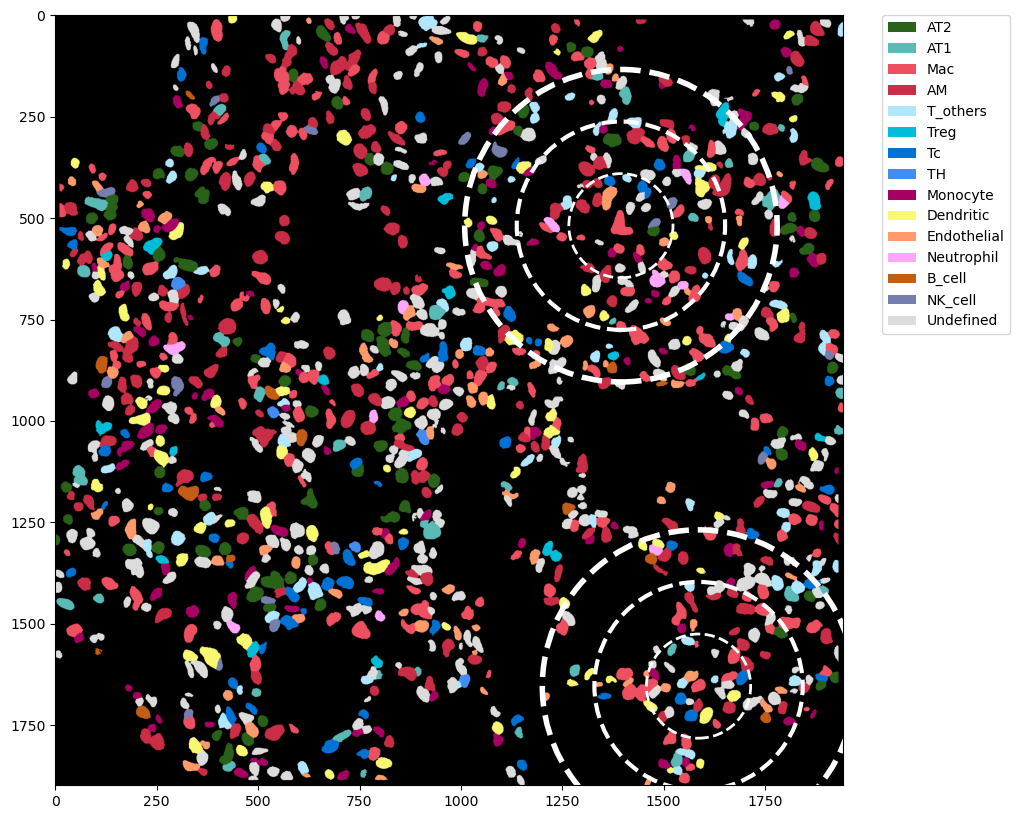

<Figure size 640x480 with 0 Axes>

In [61]:
samples = ["A2-1"]
input_dir = './cluster-niche'

cell_types = ['AT2',
 'AT1',
 'Mac',
 'AM',
 'T_others',
 'Treg',
 'Tc',
 'TH',
 'Monocyte',
 'Dendritic',
 'Endothelial',
 'Neutrophil',
 'B_cell',
 'NK_cell',
 'Undefined']

colors = ["#296218", "#5ABAB6", "#EE5061", "#CA2D46", 
          "#B0E7FF", "#00BDD9", "#0072D4", "#428CF2", 
          "#A70063", "#F9F871", "#FF9A6B", "#FFA7FF", 
          "#C35D14", "#757FAF", "#DCDCDC"]


for sample in samples:
    print(sample)    
    cell_df = pd.read_csv(f"./{input_dir}/{sample}.csv", sep=",")
    cell_df = cell_df.drop(columns=['niche'])
    last_row = cell_df.iloc[-1]
    file = sample.split('-')[0]
    id = sample.split('-')[1]
    mask = imread(f"../mask/{file}_{id}_mask.tif")
    print(mask.shape)
    mask = mask
    new_mask = get_new_mask(mask, cell_df)
    m0 = new_mask
    fig, ax = plt.subplots(figsize=(20, 10))
    # ax.imshow(binary, alpha=1)
    output_path = f'./{sample}.pdf'
    center_cells = cell_df[cell_df['B646L'] > 27][:2]
    center_cells['y'] = center_cells['cell'].str.split(")").str[0].str.split(",").str[1].astype(float)
    center_cells['x'] = center_cells['cell'].str.split("(").str[1].str.split(",").str[0].astype(float)
    x = center_cells['x']
    y = center_cells['y']
    _outer_size_in_pixels = 300  # Example: 150 pixels in diameter
    _outer_area_in_points = (_outer_size_in_pixels / (96 / 72))**2  # Convert pixels to points
    outer_size_in_pixels = 200  # Example: 150 pixels in diameter
    outer_area_in_points = (outer_size_in_pixels / (96 / 72))**2  # Convert pixels to points
    inner_size_in_pixels = 100  # Example: 100 pixels in diameter
    inner_area_in_points = (inner_size_in_pixels / (96 / 72))**2  # Convert pixels to points
    ax.scatter(y, x, s=_outer_area_in_points, marker='o', edgecolors='white', facecolors='none', linewidths=4,linestyle='--')
    ax.scatter(y, x, s=outer_area_in_points, marker='o', edgecolors='white', facecolors='none', linewidths=3,linestyle='--')
    ax.scatter(y, x, s=inner_area_in_points, marker='o', edgecolors='white', facecolors='none', linewidths=2,linestyle='--')
    draw_type_mask(ax, new_mask, colors=colors, labels=cell_types)
    ax.axis('off')
    output_path = f'./{sample}.pdf'
    plt.savefig(output_path, format='pdf', bbox_inches='tight')
    plt.show()